# **DATA PREPROCESSING**

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

In [10]:
print(df.head(10))

   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   
5     148462   24       1          1        173                0   
6     168686   79       1          2        130              240   
7     170498   52       1          0        127              345   
8     188225   62       1          0        121              357   
9     192523   61       0          0        190              181   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2             

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [12]:
df.isnull().any()

,0
patientid,False
age,False
gender,False
chestpain,False
restingBP,False
serumcholestrol,False
fastingbloodsugar,False
restingrelectro,False
maxheartrate,False
exerciseangia,False


Removing Duplicate if any

In [13]:
df.shape

(1000, 14)

In [14]:
df = df.drop_duplicates()
df.shape

(1000, 14)

In [15]:
duplicates = df.duplicated(subset='patientid', keep=False)
duplicate_rows = df[duplicates]

if duplicate_rows.empty:
    print("All patient IDs are unique.")
else:
    print("There are duplicate patient IDs in the dataset.")
    print(duplicate_rows)

All patient IDs are unique.


In [16]:
df = df.drop(columns="patientid")

In [17]:
df.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')

In [18]:
df = df.drop_duplicates()
df.shape

(1000, 13)

EDA

In [19]:
df.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [20]:
df.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')

<Axes: >

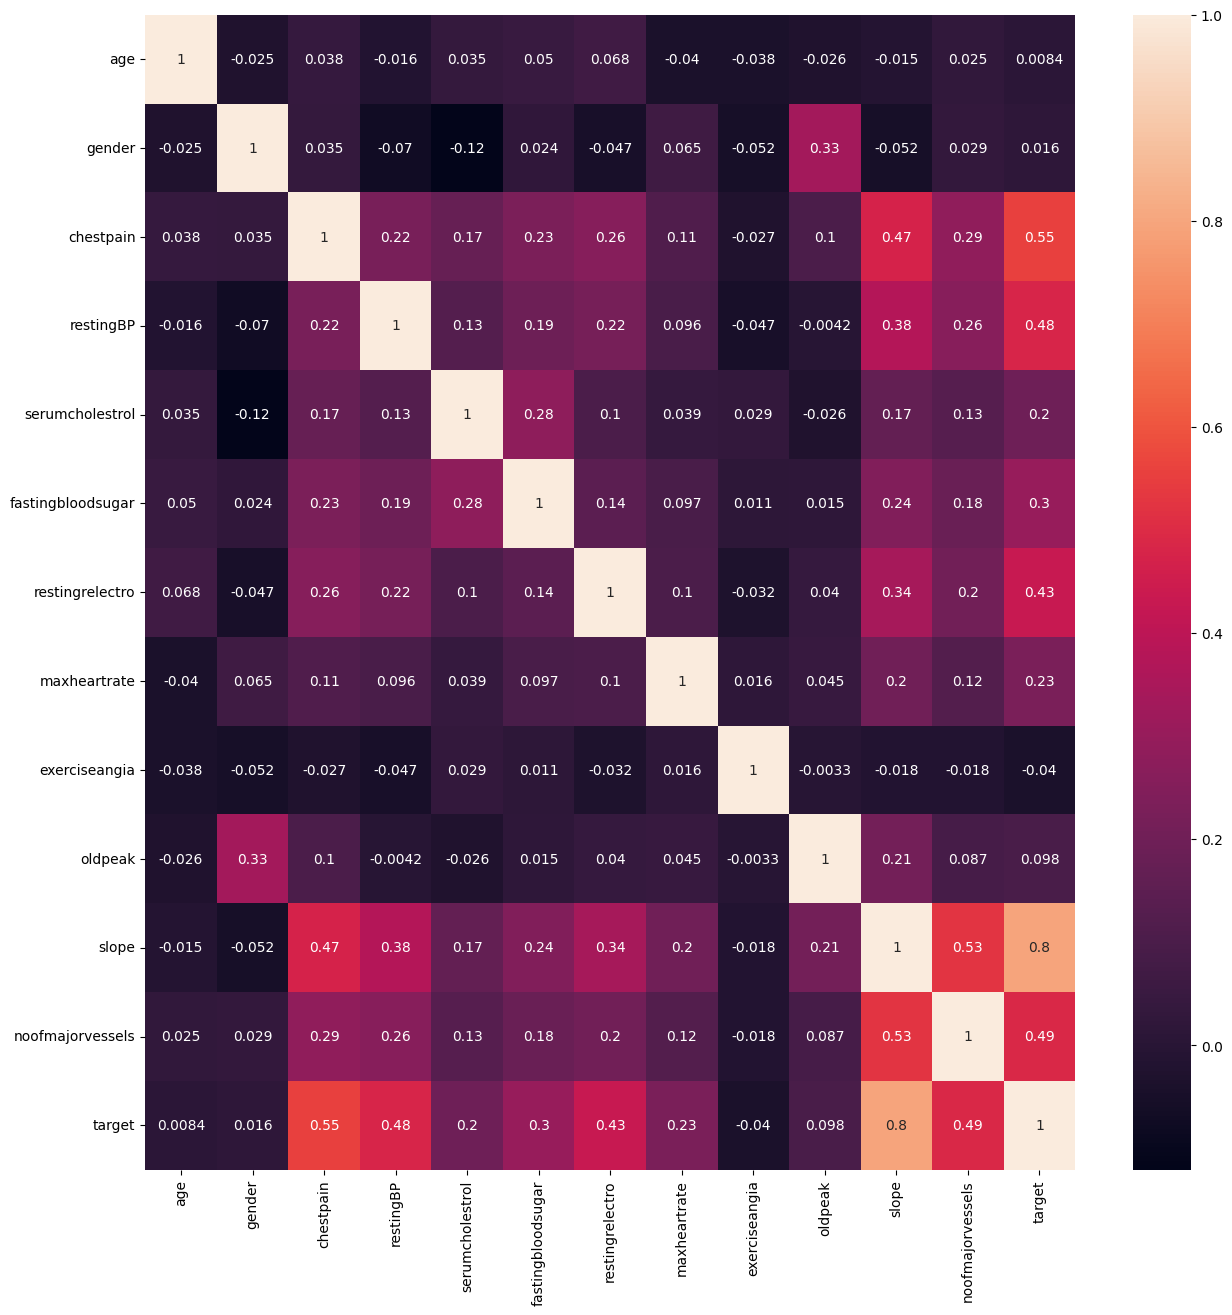

In [21]:
correlation = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlation,annot=True)

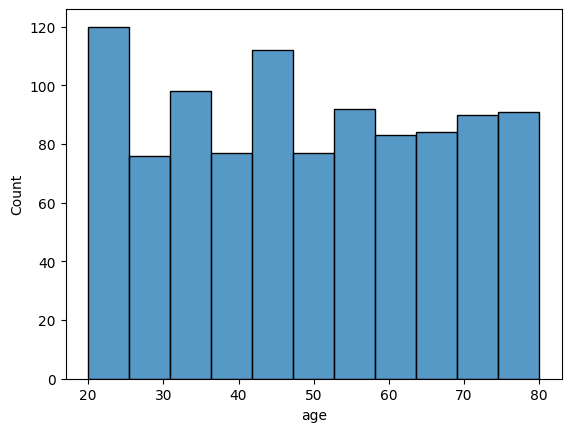

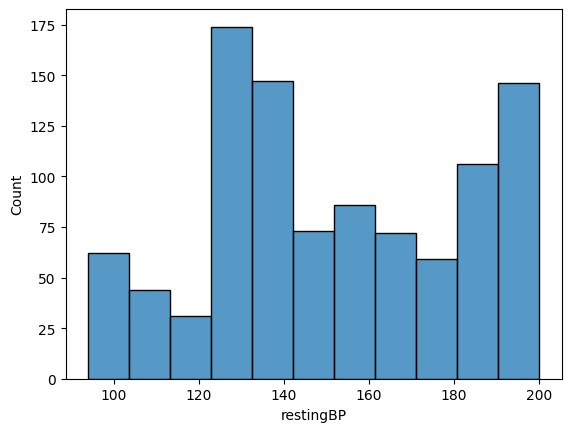

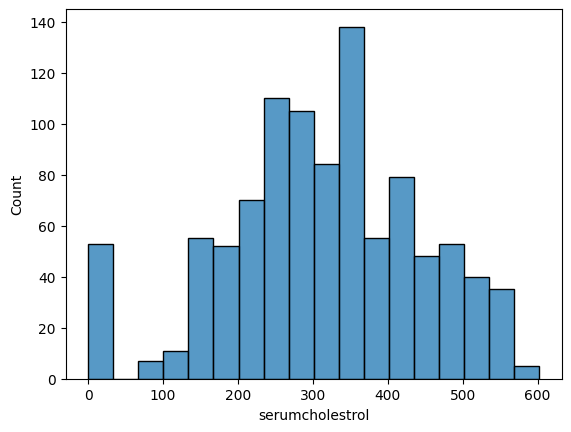

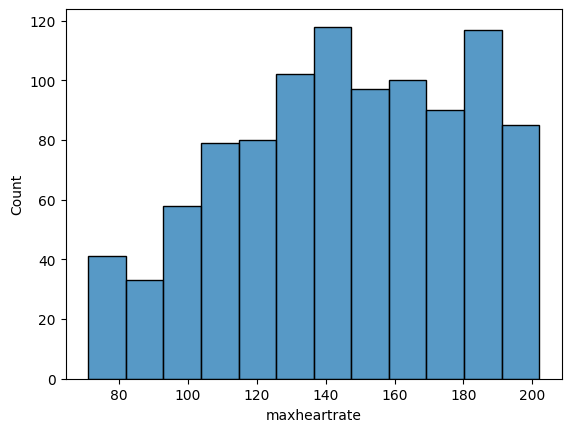

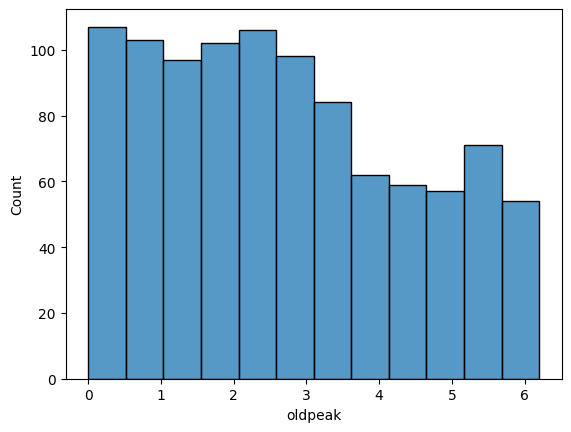

In [22]:
for i in ["age", "restingBP", "serumcholestrol", "maxheartrate","oldpeak"]:
    sns.histplot(data=df, x=df[i])
    plt.show()

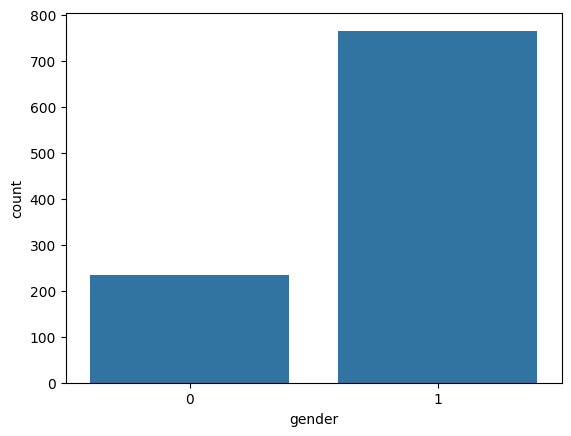

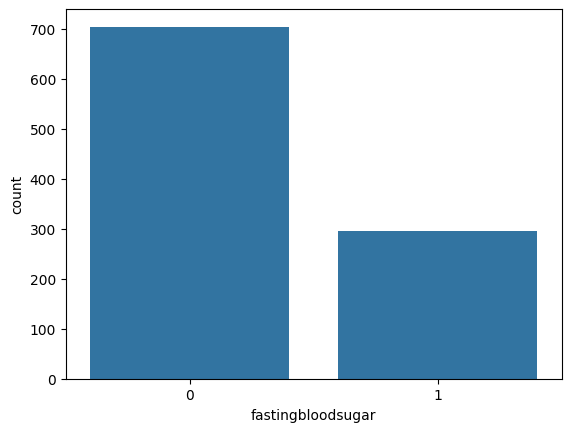

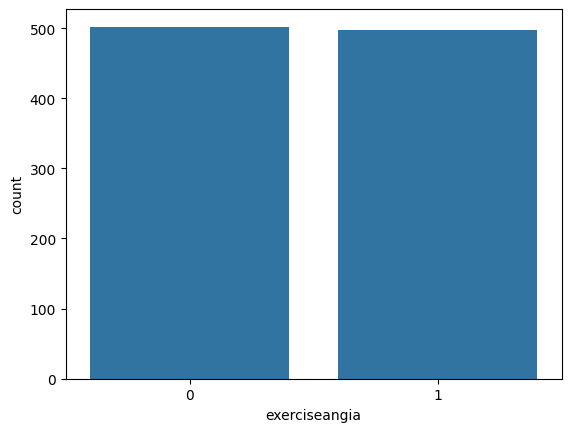

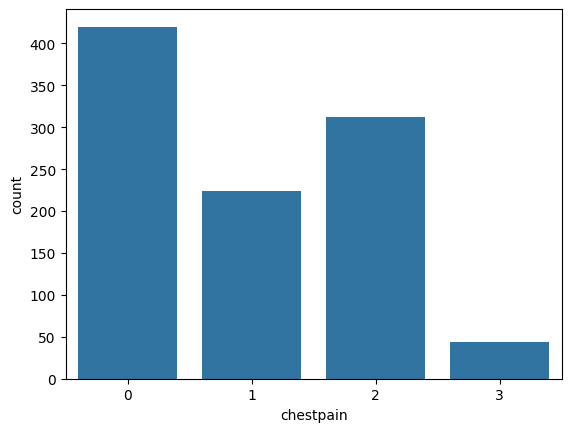

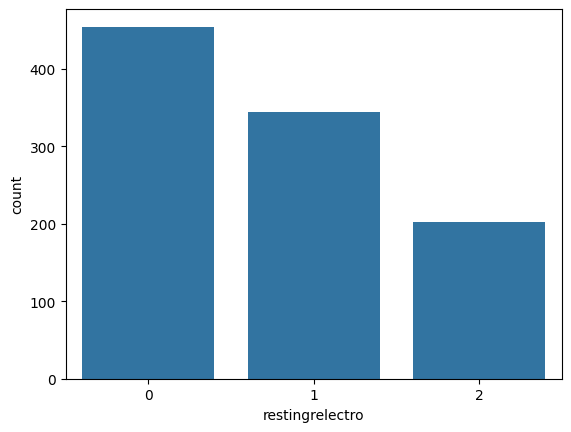

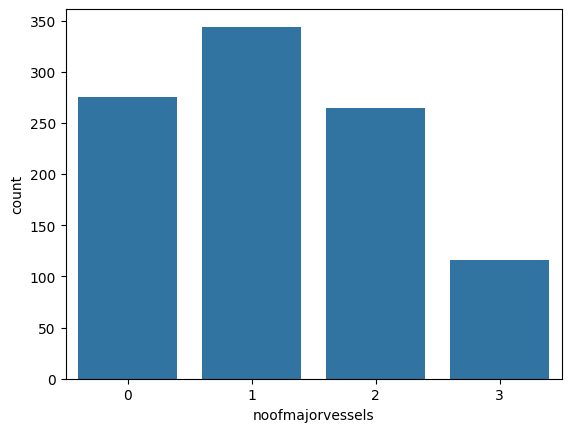

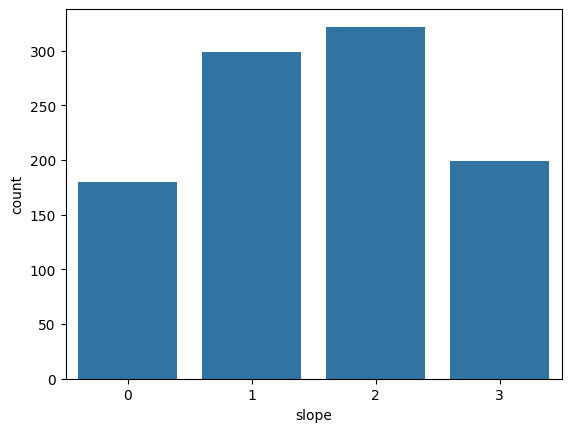

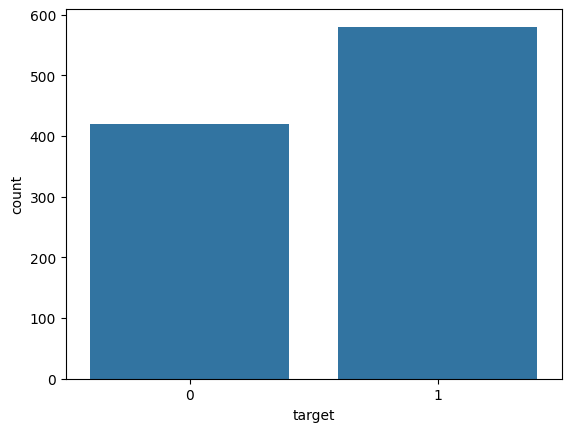

In [23]:
#for binary values
for i in ["gender",'fastingbloodsugar',"exerciseangia","chestpain", "restingrelectro", "noofmajorvessels","slope","target"]:
    sns.countplot(x=df[i], data=df)
    plt.show()

In [24]:
df.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')

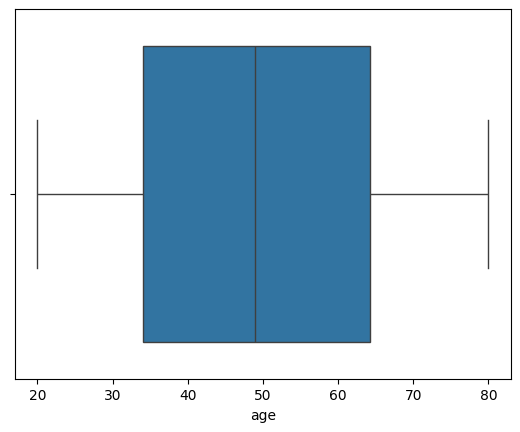

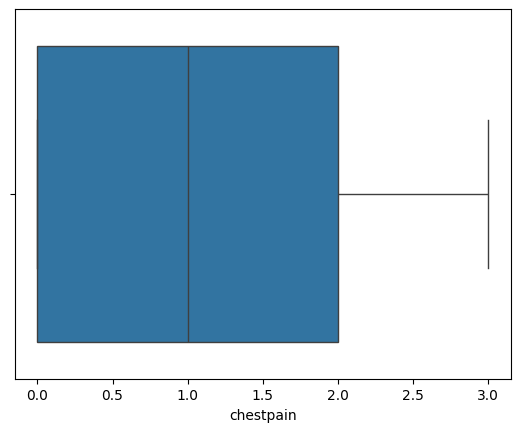

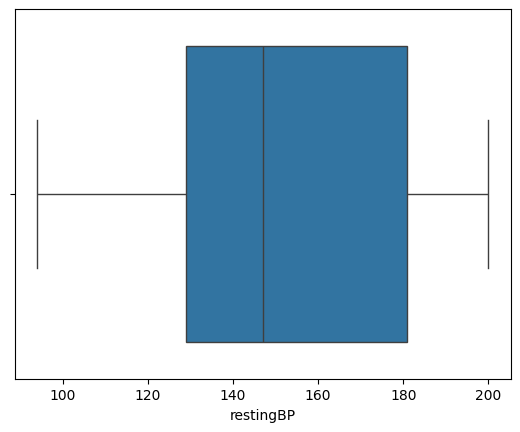

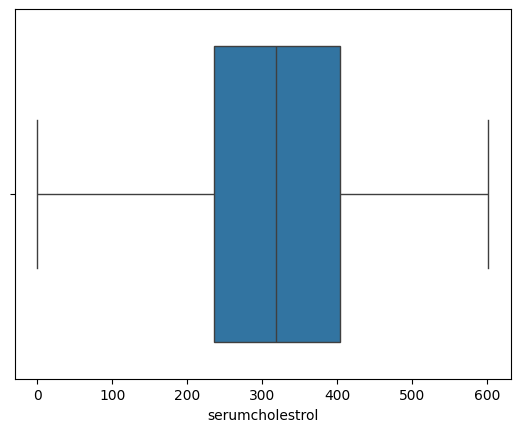

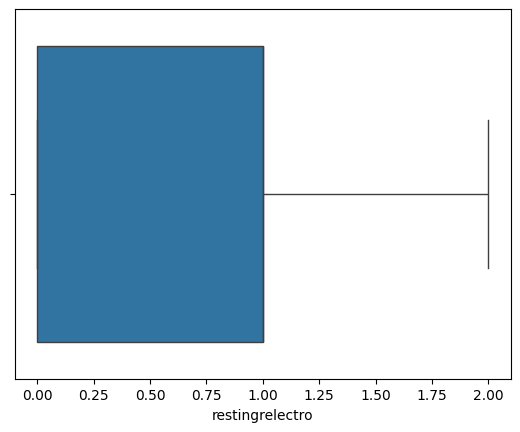

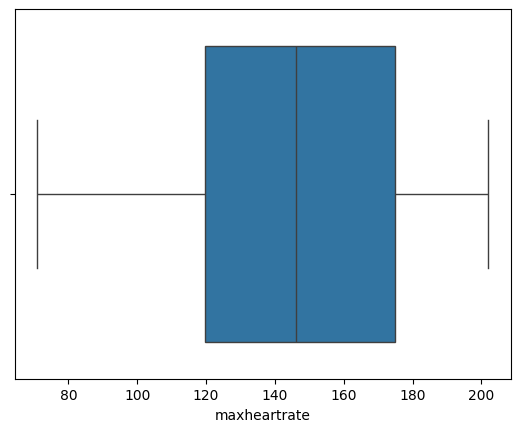

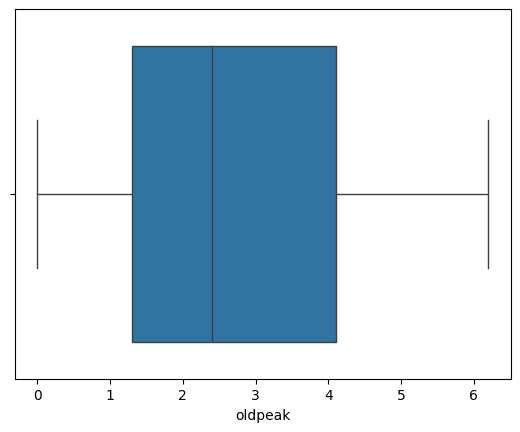

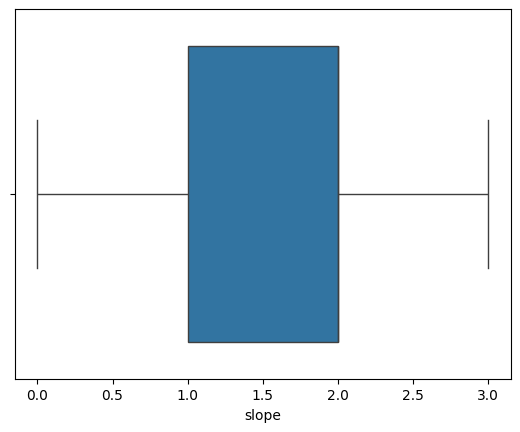

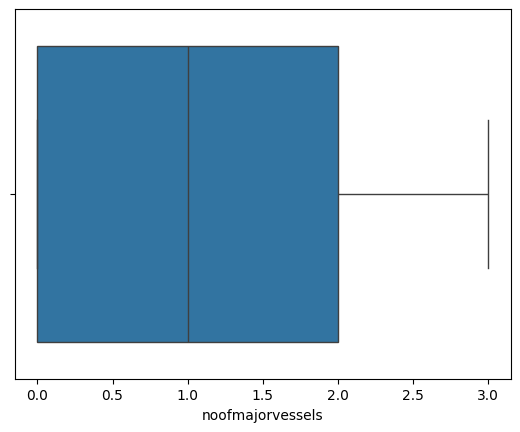

In [25]:
for i in ["age" ,"chestpain" ,"restingBP" ,"serumcholestrol","restingrelectro","maxheartrate","oldpeak","slope","noofmajorvessels"]:
    sns.boxplot(data = df,x = df[i])
    plt.show()

In [26]:
# Serum cholestrol can only have values ranging for 126 - 564 but some 0 values are present
# SINCE NO outliers present it can considered as noise and is df1 is used to make changes

zero_cholestrol_rows = df[df['serumcholestrol'] == 0]

zero_cholestrol_indexes = zero_cholestrol_rows.index

print("Rows count with serumcholestrol value of 0:")
print(zero_cholestrol_rows.shape[0])

Rows count with serumcholestrol value of 0:
53


In [27]:
zero_cholestrol_rows = df[df['serumcholestrol'] > 564]

zero_cholestrol_indexes = zero_cholestrol_rows.index

print("Rows count with serumcholestrol value greater than 564:")
print(zero_cholestrol_rows.shape[0])

Rows count with serumcholestrol value greater than 564:
5


In [28]:
# since the row count with serumcholestrol value greater than 564 is 5 , we can ignore it
df1 = df.copy()
df1['serumcholestrol'].replace(0, np.nan, inplace=True)

In [29]:
df1.isnull().sum()

,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,53
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0
oldpeak,0



Handling Missing Data

In [30]:
# for knn imputation we are gonna use df1
from sklearn.impute import KNNImputer

imputer = KNNImputer()

df1 = imputer.fit_transform(df1)

df1 = pd.DataFrame(df1, columns=df.columns)

In [31]:

df1.isnull().sum()

,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0
oldpeak,0


In [32]:

x = df.corr()

In [33]:
target_column = "target"
sorted_corr = x[target_column].sort_values(ascending=False)
sorted_corr

,target
target,1.000000
slope,0.797358
chestpain,0.554228
noofmajorvessels,0.489866
restingBP,0.482387
restingrelectro,0.426837
fastingbloodsugar,0.303233
maxheartrate,0.228343
serumcholestrol,0.195340
oldpeak,0.098053


In [34]:
# from this we can see that the exerciseangia has the lowest correlation with heart diesease

In [35]:

df = df.drop(columns="exerciseangia")
df1 = df1.drop(columns="exerciseangia")

In [36]:
print(df.columns)
print(df.shape)

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'oldpeak',
       'slope', 'noofmajorvessels', 'target'],
      dtype='object')
(1000, 12)


In [37]:
print(df1.columns)
print(df1.shape)

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'oldpeak',
       'slope', 'noofmajorvessels', 'target'],
      dtype='object')
(1000, 12)


# TASK - 01
# Linear Regression

Mean Squared Error: 0.0593
Mean Absolute Error: 0.2021
R-squared: 0.7559


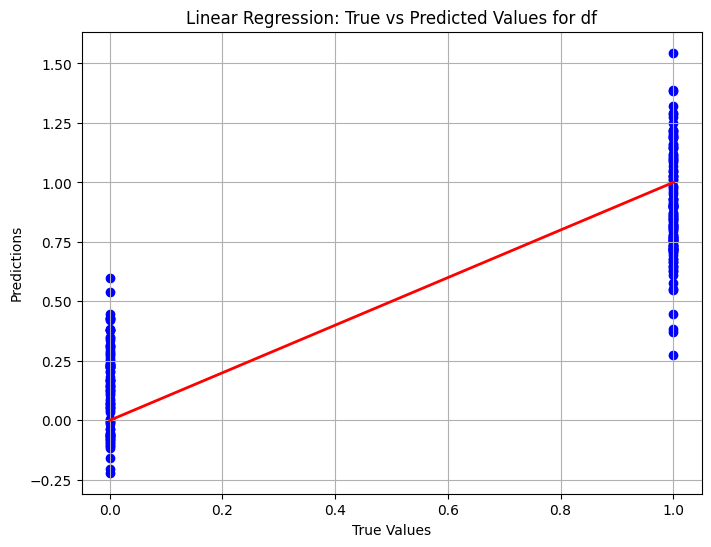

Cross-validated R-squared: 0.7369


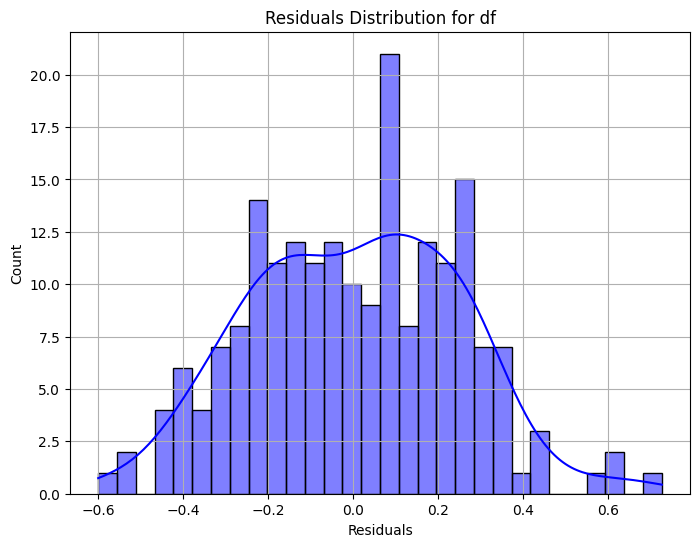

Mean Squared Error: 0.0570
Mean Absolute Error: 0.1955
R-squared: 0.7653


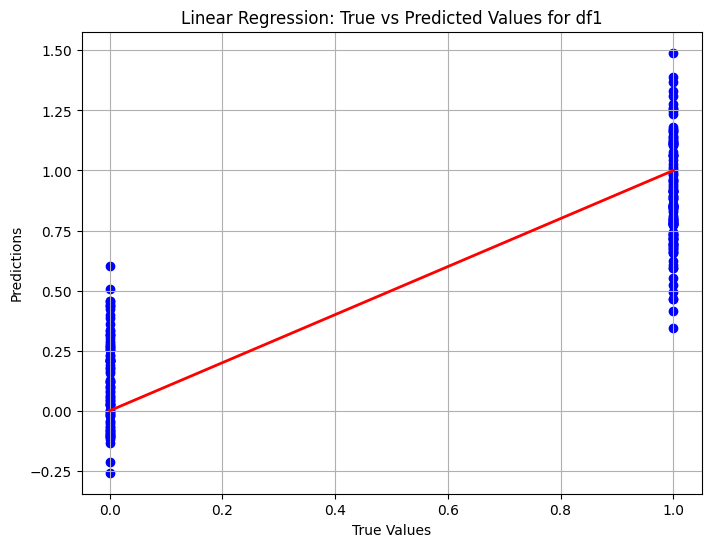

Cross-validated R-squared: 0.7451


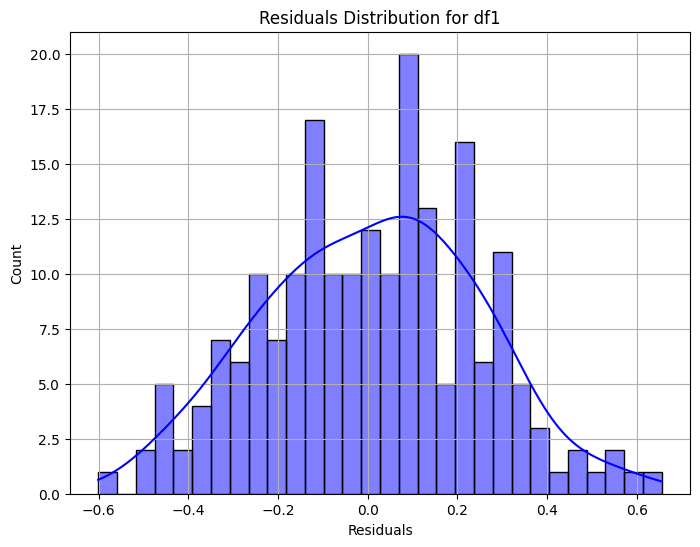

In [38]:

def linear_regression(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the Linear Regression model
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # Predict the test set results
    y_pred = linreg.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'R-squared: {r2:.4f}')

    # Plot the predicted vs actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'Linear Regression: True vs Predicted Values for {dataset_label}')
    plt.grid(True)
    plt.show()

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(linreg, X, y, cv=cv, scoring='r2')
    print(f"Cross-validated R-squared: {scores.mean():.4f}")

    # Residuals Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, bins=30, kde=True, color='blue')
    plt.title(f'Residuals Distribution for {dataset_label}')
    plt.xlabel('Residuals')
    plt.grid(True)
    plt.show()

# Example usage with datasets
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}

for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    linear_regression(X, y, label)


# **TASK - 02**
# **KNN**

0.9962448765758867
[[ 81   2]
 [  4 113]]


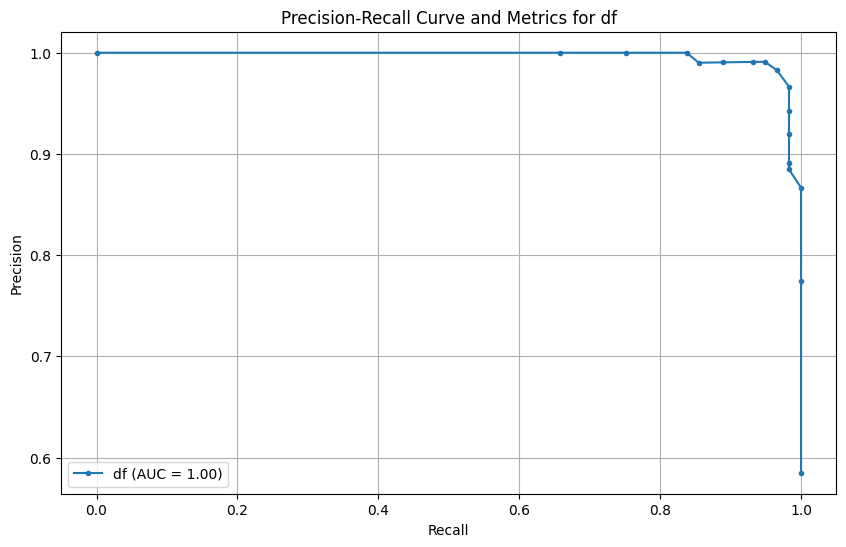

Accuracy for df: 0.97
Classification Report for df:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        83
         1.0       0.98      0.97      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



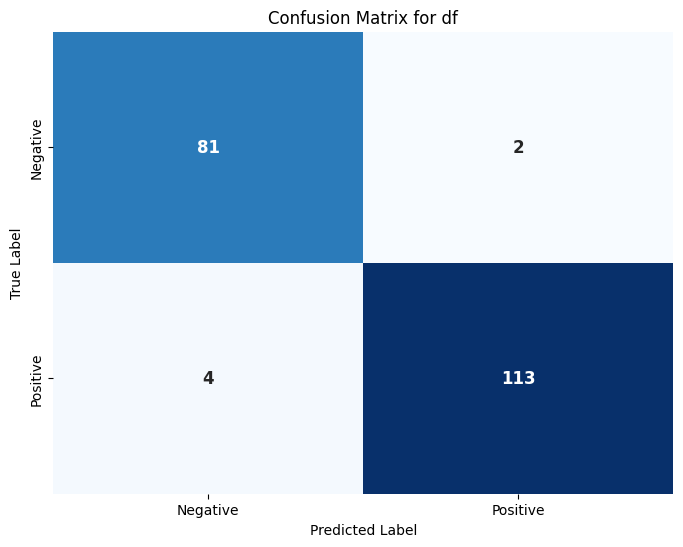

0.9962448765758867
[[ 81   2]
 [  4 113]]


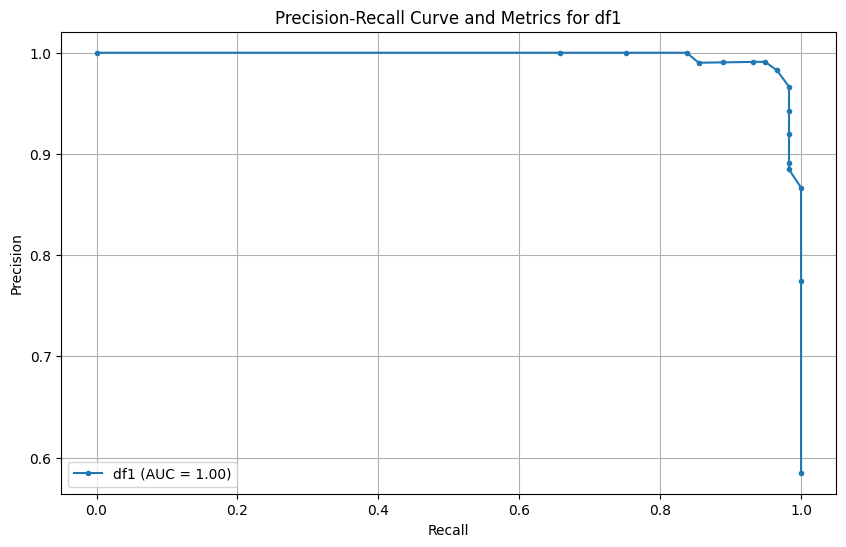

Accuracy for df1: 0.97
Classification Report for df1:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        83
         1.0       0.98      0.97      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



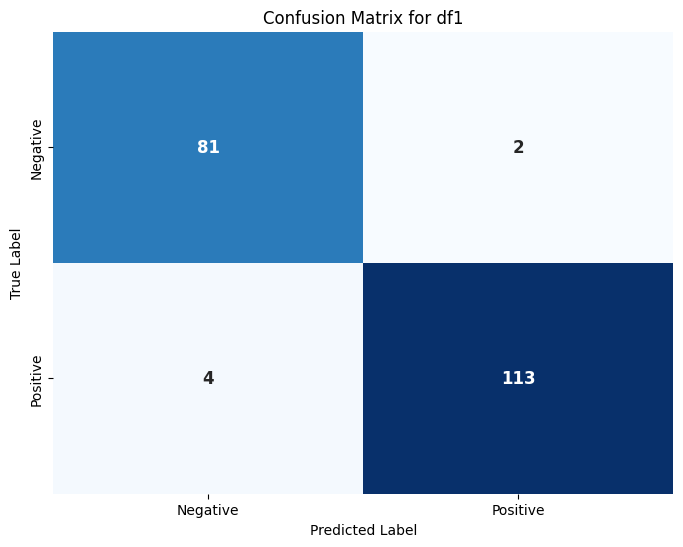

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to perform KNN with scaling, plot PR curve, calculate AUC, accuracy, classification report, and confusion matrix
def knn_pr_curve_and_report(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the StandardScaler and scale the training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Scale the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=15)

    # Fit the classifier on the scaled training data
    knn.fit(X_train_scaled, y_train)

    # Get the predicted probabilities for the positive class
    y_scores = knn.predict_proba(X_test_scaled)[:, 1]

    # Calculate precision and recall values
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)
    print(pr_auc)

    # Calculate accuracy
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)

    # Plot the PR curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='.', label=f'{dataset_label} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve and Metrics for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print accuracy, classification report, and confusion matrix
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')
    print(f'Classification Report for {dataset_label}:')
    print(class_report)

    # Plot confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"})
    plt.title(f'Confusion Matrix for {dataset_label}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust x-axis labels
    plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust y-axis labels
    plt.show()

# Dataset labels and data
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}

# Iterate through each dataset, perform KNN classification with scaling, plot PR curve, and print metrics
for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    knn_pr_curve_and_report(X, y, label)

# **TASK - 03**
# **SVM**

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

Best parameters found for df: {'kernel': 'rbf'}
Classification Report for df: 
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96        83
         1.0       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.97       200

PR AUC: 0.9967262769515364
Accuracy for df: 0.96


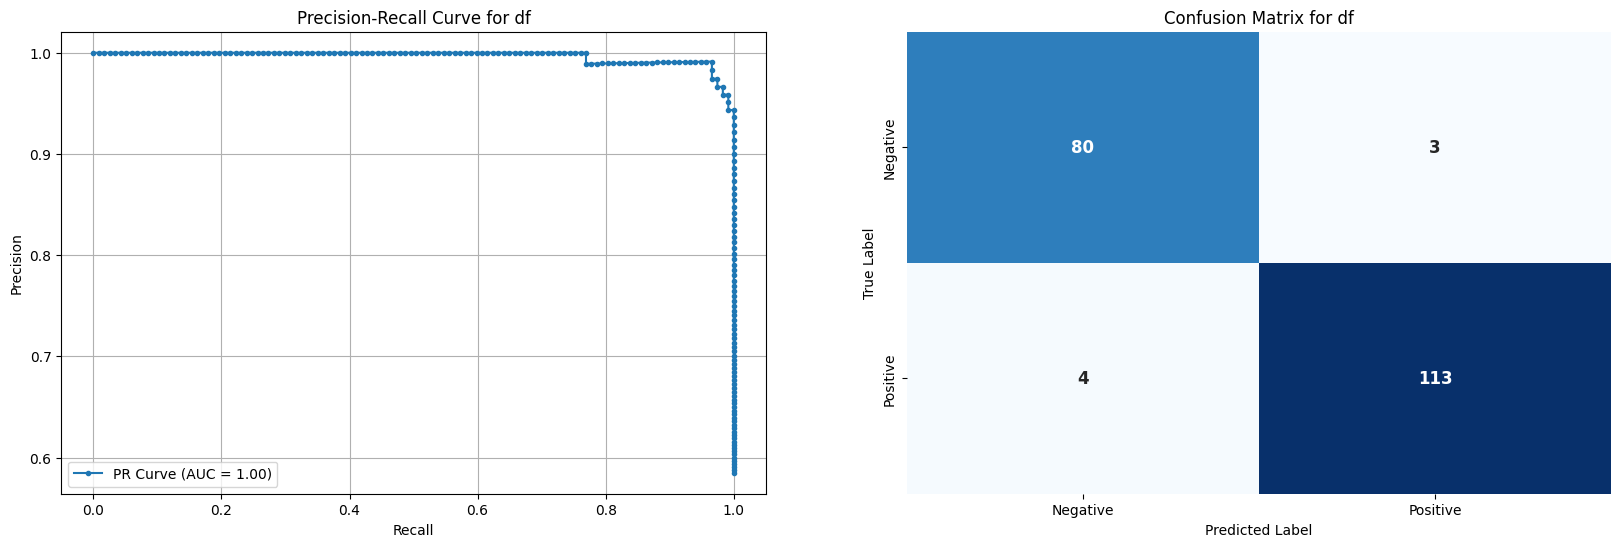

Best parameters found for df1: {'kernel': 'rbf'}
Classification Report for df1: 
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96        83
         1.0       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.97       200

PR AUC: 0.9967262769515364
Accuracy for df1: 0.96


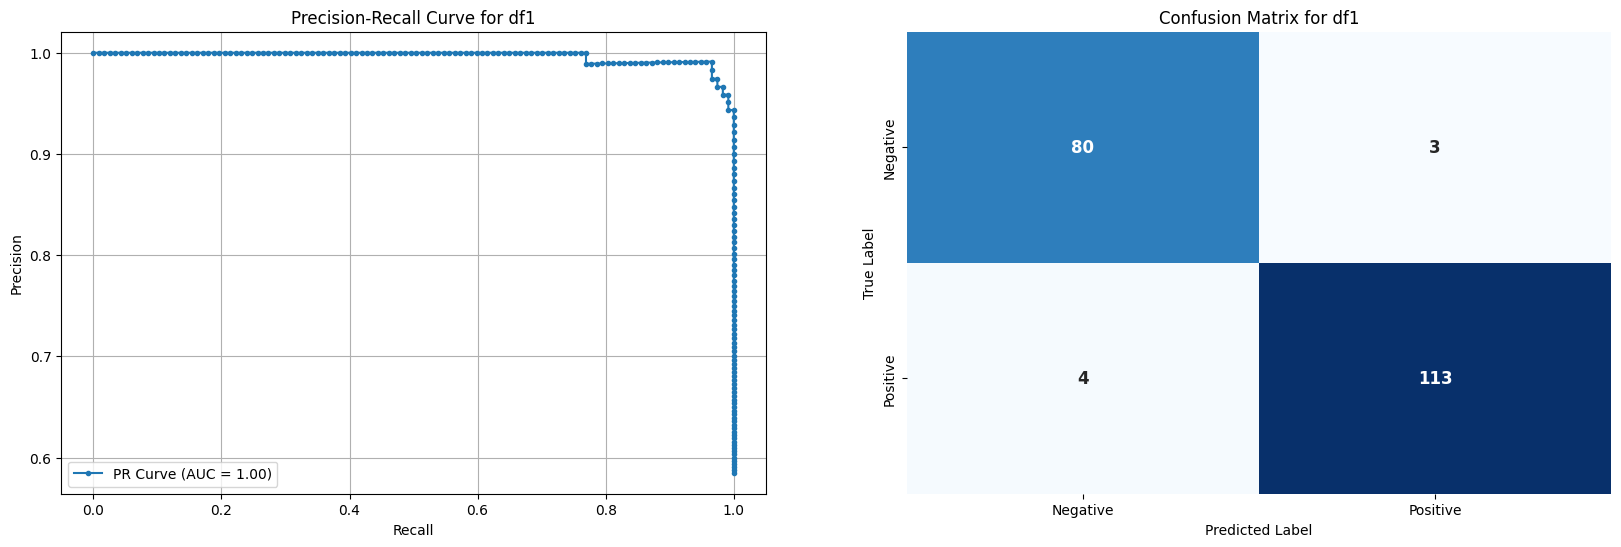

In [41]:
def evaluate_svm(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the StandardScaler and scale the training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Scale the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the SVM classifier
    svm_clf = SVC(C = 1.0, probability=True)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }

    # Perform Grid Search to find the best parameters
    grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best parameters found by Grid Search
    best_params = grid_search.best_params_
    print(f'Best parameters found for {dataset_label}: {best_params}')

    # Use best parameters to train SVM
    best_svm_clf = SVC(**best_params, probability=True)
    best_svm_clf.fit(X_train_scaled, y_train)

    # Fit the classifier on the scaled training data
    best_svm_clf.fit(X_train_scaled, y_train)

    # Get the predicted probabilities for the positive class
    y_scores = best_svm_clf.predict_proba(X_test_scaled)[:, 1]
    y_pred = best_svm_clf.predict(X_test_scaled)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)
    print(f'Classification Report for {dataset_label}: \n{class_report}')
 # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)
    print(f'PR AUC: {pr_auc}')

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')

    # Create subplots for the PR curve and confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))

    # Plot the PR curve
    ax[0].plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title(f'Precision-Recall Curve for {dataset_label}')
    ax[0].legend()
    ax[0].grid(True)

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"}, ax=ax[1])
    ax[1].set_title(f'Confusion Matrix for {dataset_label}')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')
    ax[1].set_xticks([0.5, 1.5])
    ax[1].set_xticklabels(['Negative', 'Positive'])
    ax[1].set_yticks([0.5, 1.5])
    ax[1].set_yticklabels(['Negative', 'Positive'])

    plt.show()

# Dataset labels and data
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}
# Iterate through each dataset, perform svm classification scaling, plot PR curve, ROC curve, and print metrics
for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    evaluate_svm(X, y, label)